Used libraries and python version:
- Python 3.11.3
- Pandas 1.5.3
- Numpy 1.24.3
- Matplotlib 3.7.1
- scikit-learn 1.2.2

# Dataset analysis

# Introduction

In this dataset analysis, we aim to identify potential features that could significantly impact whether a transaction is fraudulent. By thoroughly analyzing the dataset, we hope to uncover patterns and correlations that will guide our feature selection and clean up our (very large) dataset.

The insights gained from this analysis will enable us to clearly and specifically formulate our two sub-questions, which will focus on the role of these features in predicting fraudulent transactions. 

# Specific data set explanation ("Transaction data")

In this section, we will dive deeper into the dataset by importing its features and providing a detailed explanation of each feature. Understanding the dataset's structure and the role of its features is essential for identifying those that may influence whether a transaction is fraudulent.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('train_transaction.csv')

# Get the column names (features)
features = df.columns
print(features)

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)


As you can see from the code, the dataset contains 394 features. We need to comb through these columns and identify which ones are most relevant for our sub-question. Before diving into feature selection, we will first provide a detailed explanation of all the columns in the next section. This will help us understand the context of each feature and decide which ones might be important for predicting fraudulent transactions.

<br>

**1.Transaction Information:**


TransactionID:  Unique identifier for each transaction.

isFraud: Binary target variable indicating whether the transaction is fraudulent or not.

TransactionDT: Time delta from a reference datetime, representing the time of the transaction.

TransactionAmt: The amount of money involved in the transaction (in USD).

ProductCD: The product code, which may refer to different types of transactions (e.g., goods or services).

<br>

**2. Payment Card Information:**

card1 - card6: Features related to the payment card, such as card type, category, issuing bank, and country.

<br>

**3. Address Information:**

addr1, addr2: Billing and mailing address information.

dist1, dist2: Distance features, likely related to geographic location (e.g., distance between billing and shipping address, IP address, etc.).
<br>
<br>

**4. Email Domain Information:**

P_emaildomain, R_emaildomain: The email domains for the purchaser and recipient. Some transactions may not have a recipient email domain.
<br>
<br>

**5. Counting Features (C1 - C14):**

These columns contain counts, such as how many addresses or phone numbers are linked to a particular payment card or how many devices are associated with the transaction.
<br>
<br>

**6. Time Delta Features (D1 - D15):**

These features represent time differences, such as the number of days since the last transaction for the same user or card.
<br>
<br>

**7. Matching Features (M1 - M9):**

These columns are used to match various aspects of the transaction, such as matching names on the card and the address.
<br>
<br>


**8. Vesta Engineered Features (V1 - V339):**

These are features engineered by the Vesta team, which include various ranking, counting, and entity relations, such as the frequency of transactions associated with a specific card, email, or address in a given time window.

## Specific dataset explenation ("Identity"data)

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('train_identity.csv')

# Get the column names (features)
features = df.columns
print(features)

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')



The identity dataset contains a variety of features related to the identity and digital security of transactions. These features primarily focus on network connection information (IP, ISP, Proxy, etc.) and digital signatures (e.g., browser, operating system, device type), which are collected by Vesta's fraud protection system and their digital security partners. These are not available for all transactions.

**Breakdown of the identity dataset:**
<br>
<br>
**1. Transaction Information:**
<br>
<br>

**TransactionID:** 
<br>Unique identifier for each transaction (this is a common feature across both datasets).
<br>
<br>

**2. Identity Features (id_01 to id_11):**
<br>

<br>
These are numerical features associated with various identity-related information, such as device ratings, IP domain ratings, proxy ratings, and behavioral fingerprints. Examples of behavioral data might include account login times, failed login attempts, and how long an account stayed on the page. These features are collected by Vesta and security partners, but due to privacy agreements, the exact definitions are not provided. They will be treated as numerical/categorical features based on the context.
<br>
<br>

**3. Additional Identity Information (id_12 to id_38):**
<br>
id_12 to id_38: These additional identity-related features may include more specific or detailed information about a transaction's associated identity, such as timestamps of certain actions or events related to the account and device. However, the exact nature of these features is not explicitly disclosed, so further investigation and assumption may be needed.
<br>
<br>

**4. Device Information:**
<br>
DeviceType: Type of device used for the transaction (e.g., mobile, desktop).
DeviceInfo: A more detailed description of the device used, which could include specific information about the browser, operating system, and version being used during the transaction.
<br>
<br>

**General Observations:**
<br>
These features primarily help to track the behavior and characteristics of the user's device and account, which can be essential in detecting suspicious or fraudulent activities. For instance, frequent failed login attempts, a proxy server used, or a device with an unusual fingerprint might suggest a higher likelihood of fraud.

After the analysis of the identity features, we can formulate a sub-question related to how these features contribute to detecting fraudulent transactions:

**Sub-question: How do specific identity-related features, such as device type, IP address patterns, and behavioral data, contribute to identifying potentially fraudulent transactions?**

## Sub questions


We have chosen to focus on one sub-question from the transaction dataset and one from the identity dataset to provide a analysis of the factors that contribute to fraudulent transactions.
<br>
By addressing both datasets separately, we aim to understand the role of both transaction details and identity-related features in fraud detection. This approach ensures a more separated investigation into the factors influencing fraudulent transactions.

**Sub-question 1 (Transaction Dataset):**
<br>
How do the features in the transaction dataset, such as transaction amount, product code, and card details, influence the likelihood of a transaction being fraudulent?
This question focuses on analyzing how various transaction-specific characteristics, such as the payment amount, the type of product or service involved, and details about the payment card, contribute to identifying fraudulent activities.

**Sub-question 2 (Identity Dataset):**
<br>
How do specific identity-related features, such as device type, IP address patterns, and behavioral data, contribute to identifying potentially fraudulent transactions?
The second sub-question investigates how identity-related factors, including device information, login behavior, and network-related details, can be used to flag suspicious activities. These features help track the user’s device and account behavior, which can serve as critical indicators of fraud. We will explore whether unusual device fingerprints, failed login attempts, or use of proxies correlate with a higher likelihood of fraudulent transactions.

# The models

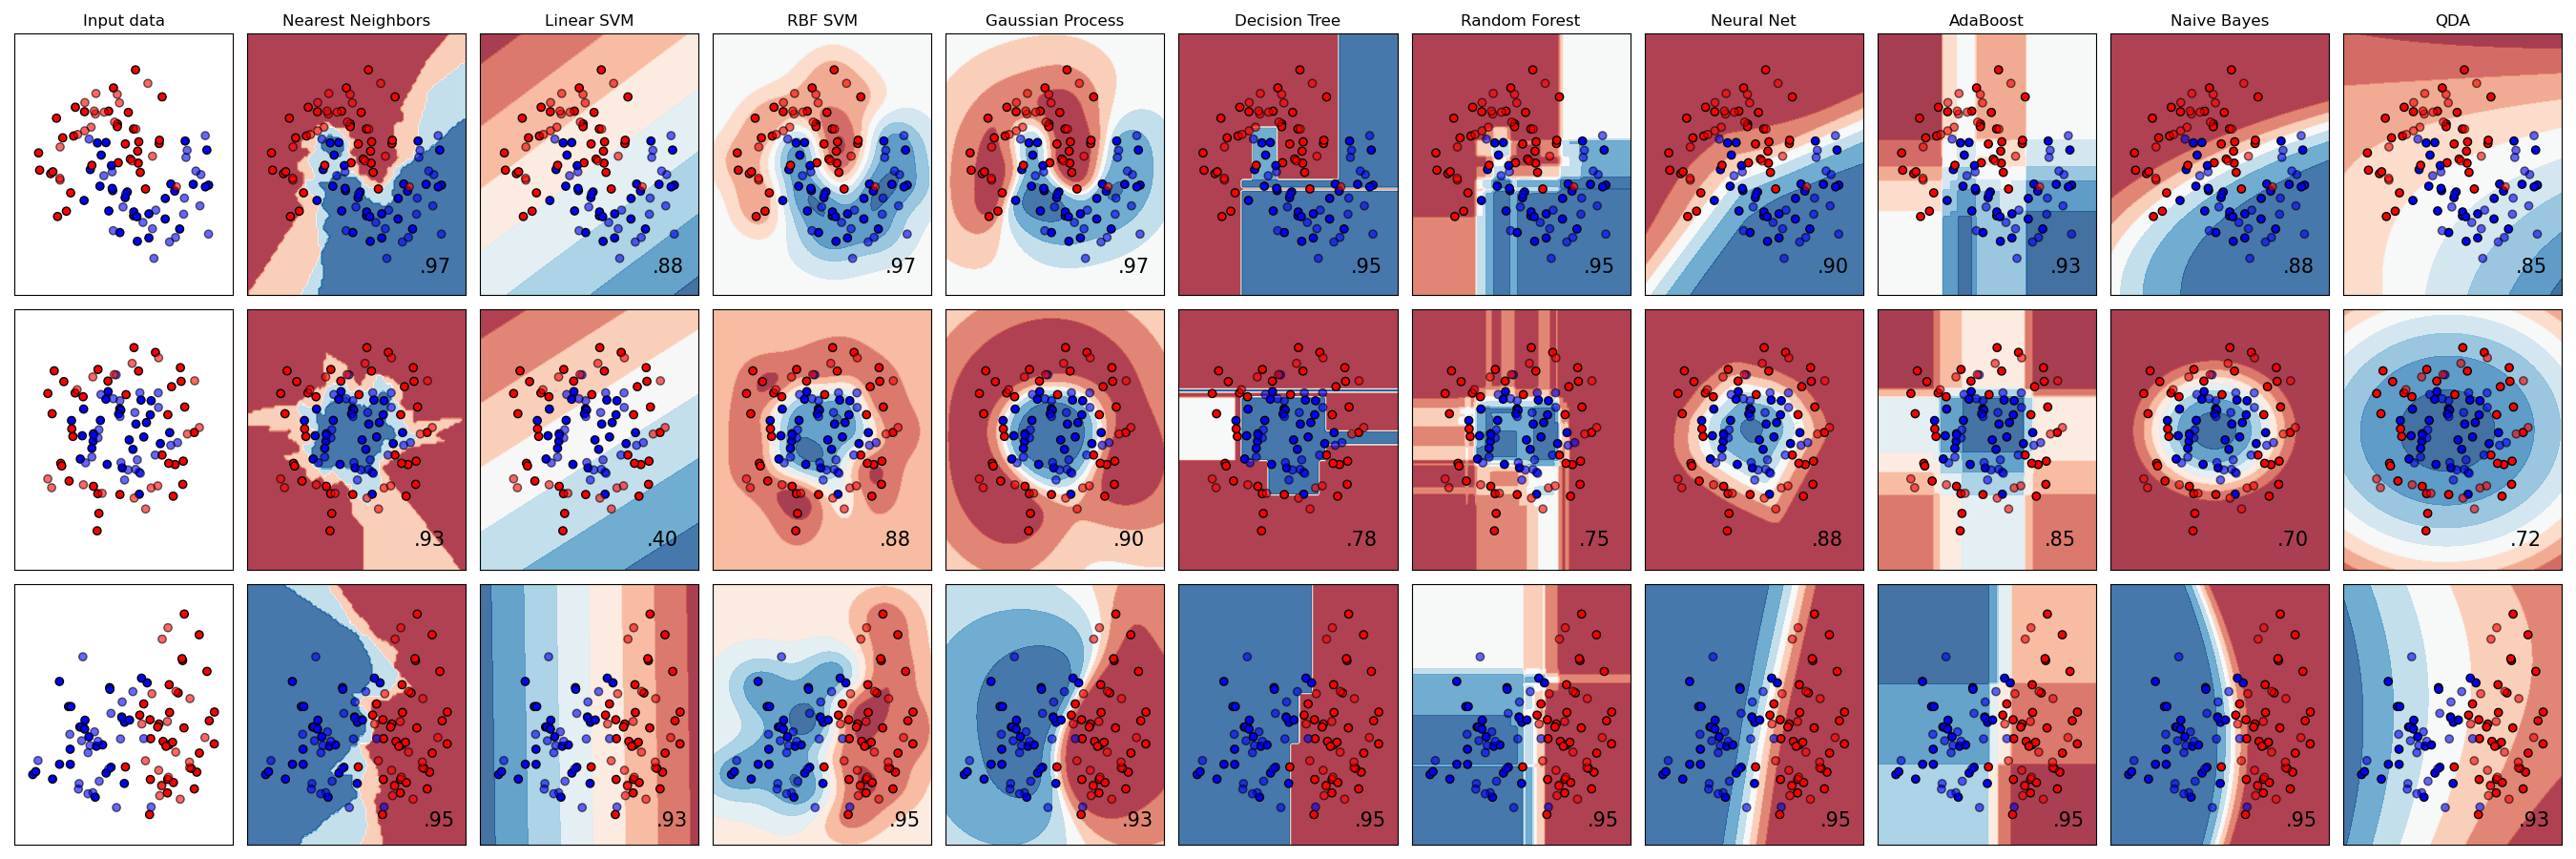

These are the classification models available in scikit-learn. We will use the Random Forest and Decision Tree models to predict whether a transaction is fraudulent or not. We will use these models because 

### Random Forest Classifier
we use random forest because it is very effective on datasets with a large number of features, it also handles irrelevant variables well.
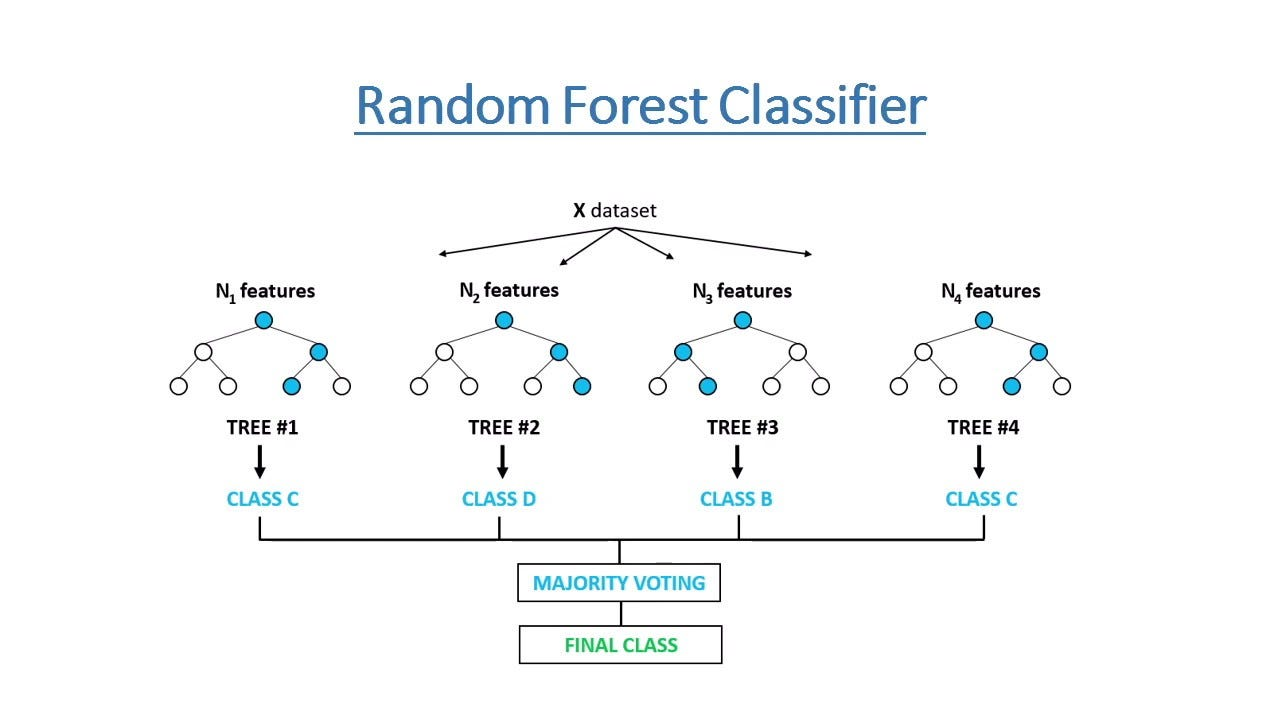

In [ ]:
# Jip will do this model

### Decision Tree Classifier

We use decision tree because it is easy to interpret and understand but we will need to select the most important features to use in the model.
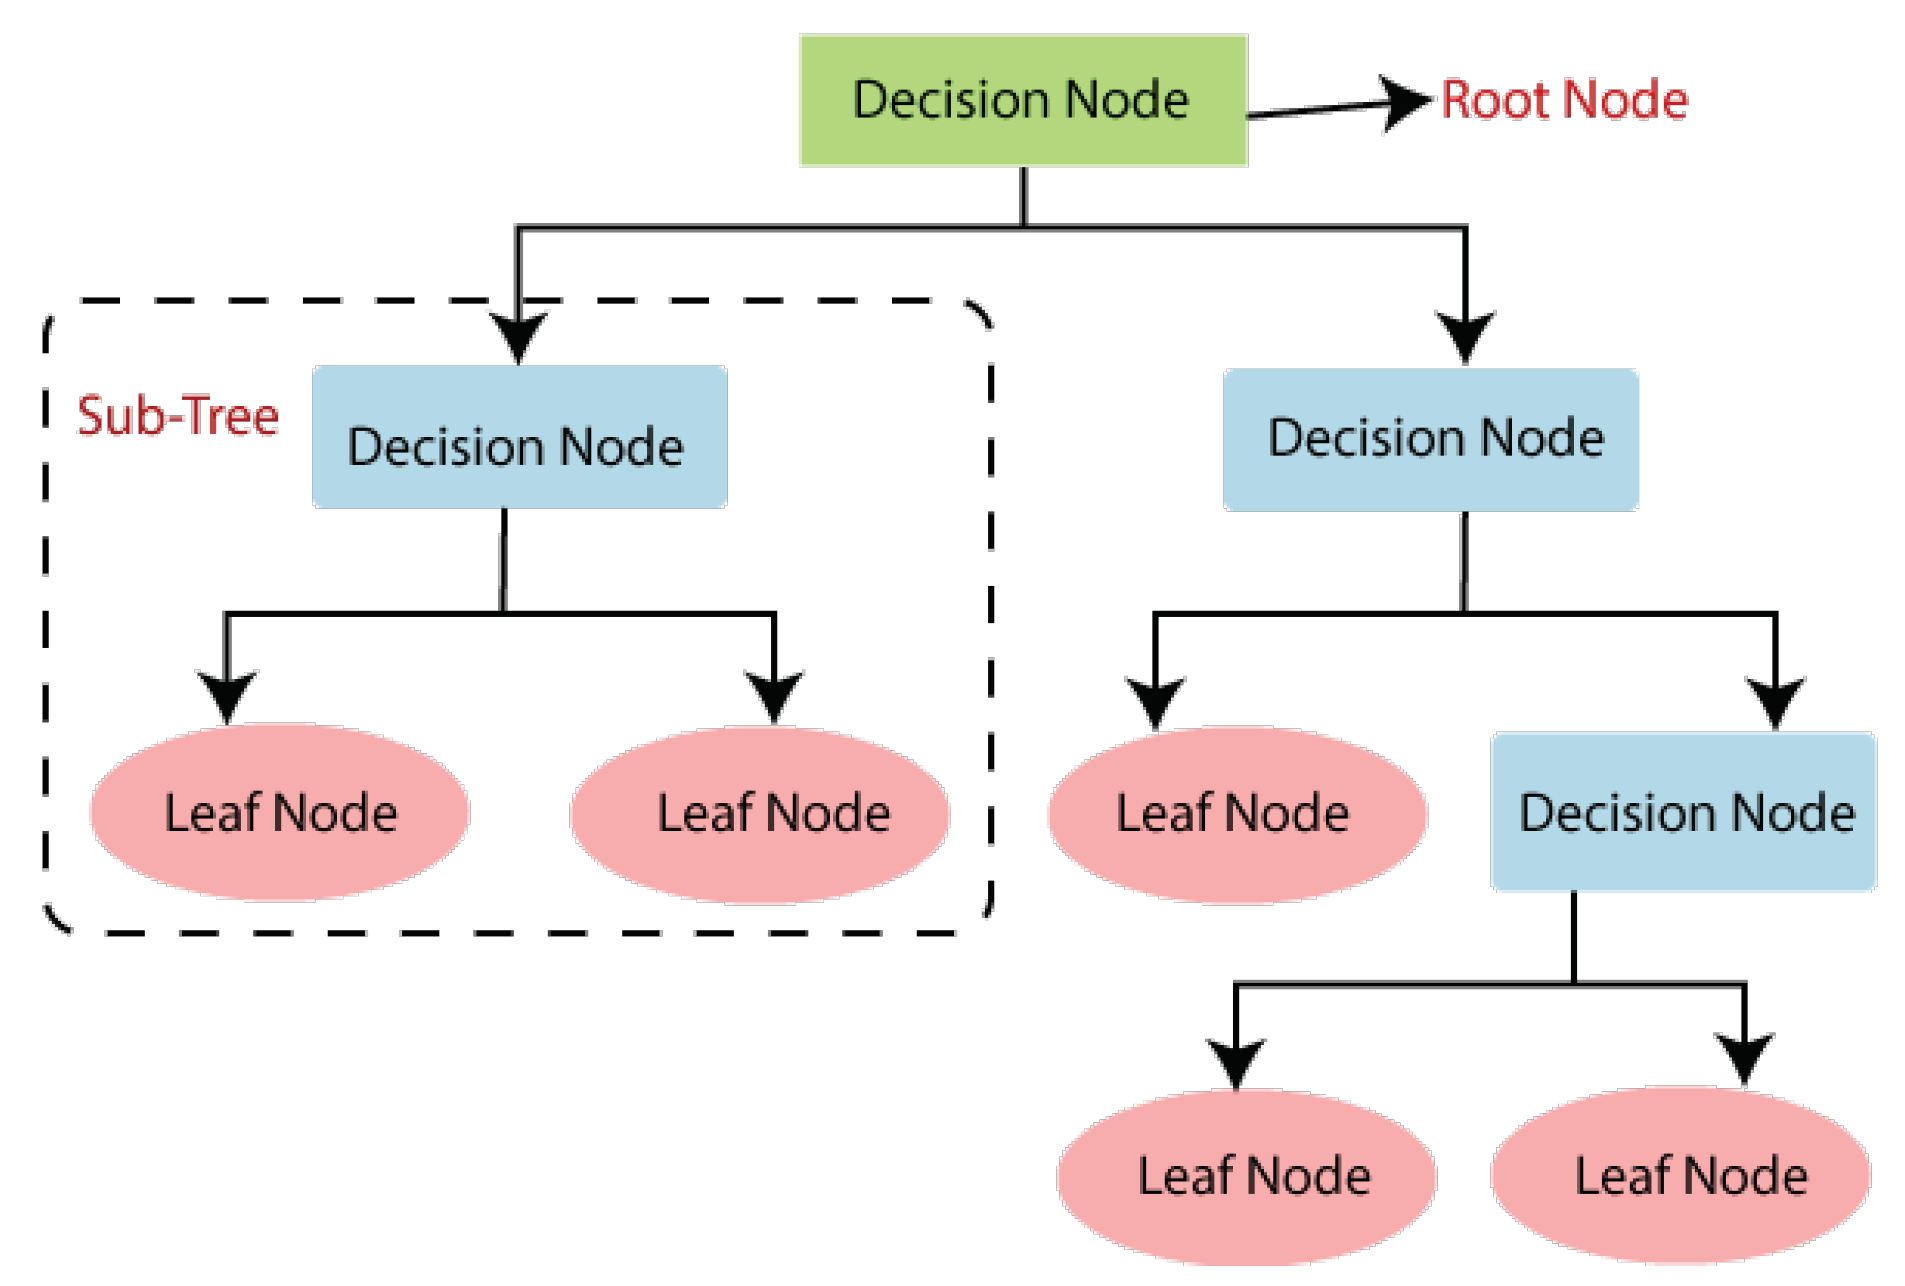

In [ ]:
# Joran will do this model

## Analysing the data

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data
train_transaction = pd.read_csv("train_transaction.csv")
train_identity = pd.read_csv("train_identity.csv")
test_transaction = pd.read_csv("test_transaction.csv")
test_identity = pd.read_csv("test_identity.csv")
# Merge the data
train_data = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test_data = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

We can merge the transaction and identity datasets on the TransactionID, this will give us 1 big dataset to work with

In [5]:
# Set pandas options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display all null values in train_data
null_counts = train_data.isnull().sum()
print(null_counts)

null_values = train_data.isnull().any().sum()
print(f"{null_values} of {train_data.shape[1]} columns have null values.")

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               8933
card3               1565
card4               1577
card5               4259
card6               1571
addr1              65706
addr2              65706
dist1             352271
dist2             552913
P_emaildomain      94456
R_emaildomain     453249
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
D1                  1269
D2                280797
D3                262878
D4                168922
D5                309841
D6                517353
D7                551623
D8                515614
D9                515614


As we can see a lot of the columns contain NaN values. We will need to clean the data and fill in the missing values. We will also need to convert the categorical columns into numerical columns so that we can use them in our model.

Here we will plot some of the columns to see how we can handle the missing values and what kind of data we are working with.

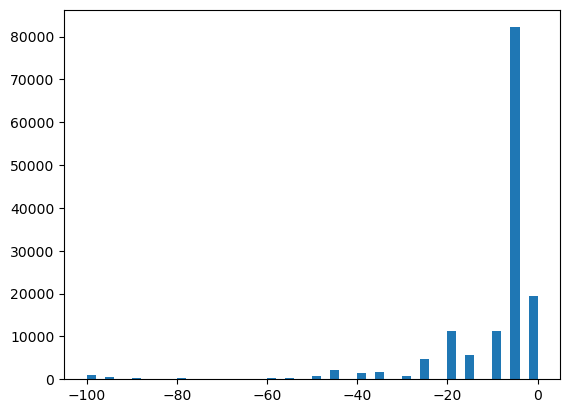

In [34]:
plt.hist(train_data['id_01'], bins=50)
plt.show()

# 

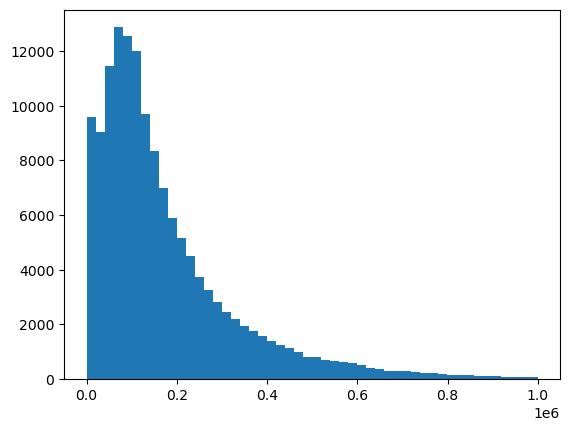

In [35]:
plt.hist(train_data["id_02"], bins=50)
plt.show()

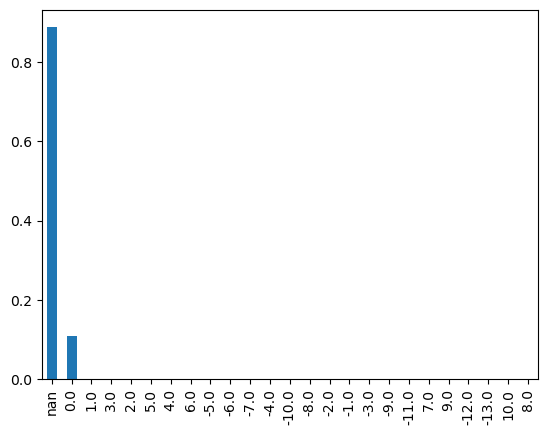

In [59]:
train_data['id_03'].value_counts(dropna=False, normalize=True).plot(kind='bar')
plt.show()

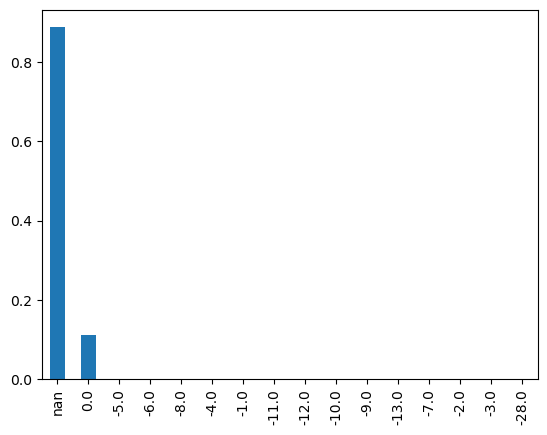

In [51]:
train_data['id_04'].value_counts(dropna=False, normalize=True).plot(kind='bar')
plt.show()

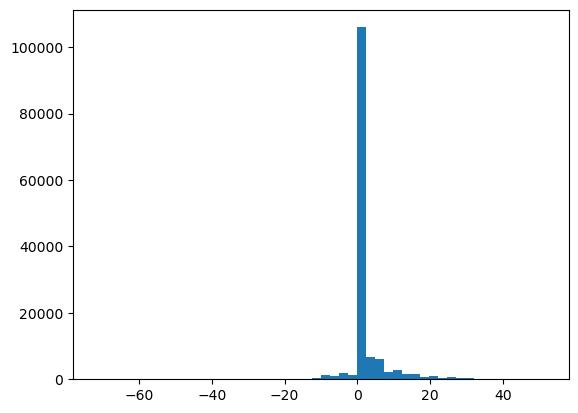

In [57]:
plt.hist(train_data["id_05"], bins=50)
plt.show()

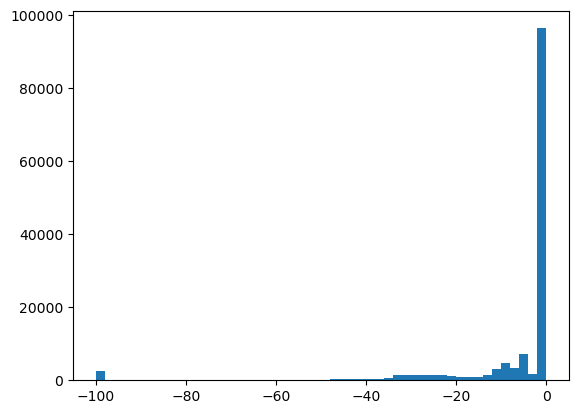

In [56]:
plt.hist(train_data["id_06"], bins=50)
plt.show()

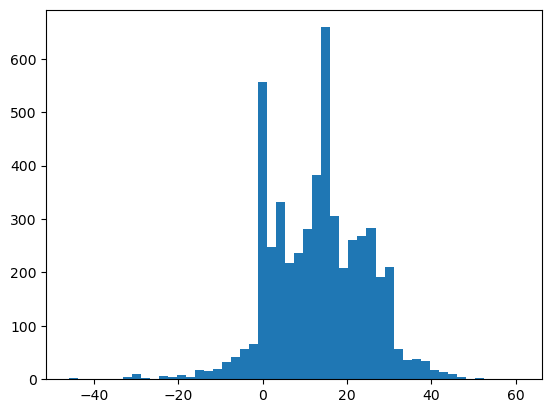

In [38]:
plt.hist(train_data["id_07"], bins=50)
plt.show()

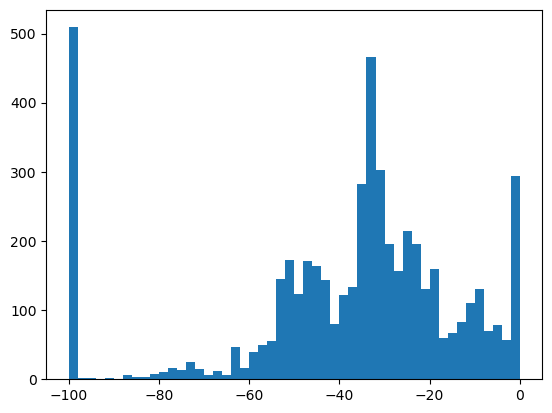

In [39]:
plt.hist(train_data["id_08"], bins=50)
plt.show()

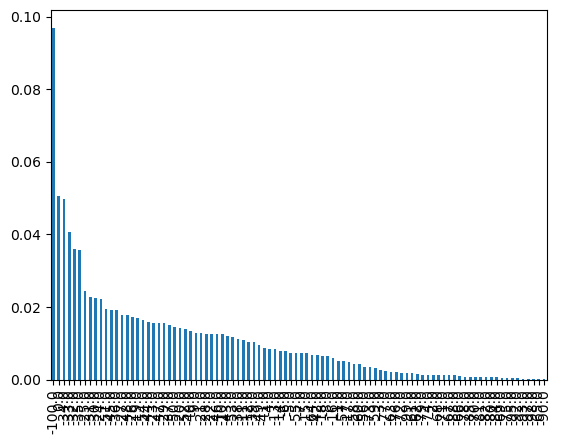

In [62]:
train_data['id_08'].value_counts(normalize=True).plot(kind='bar')
plt.show()

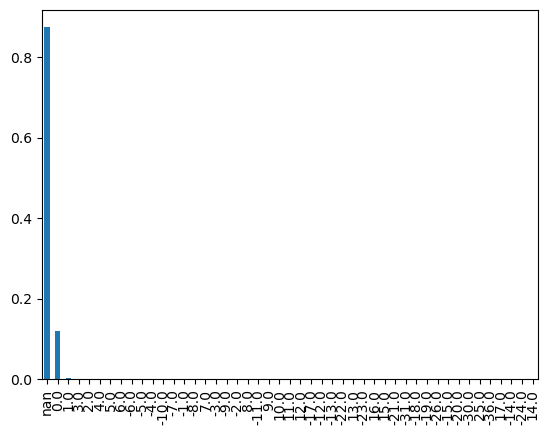

In [11]:
train_data['id_09'].value_counts(dropna=False, normalize=True).plot(kind='bar')
plt.show()

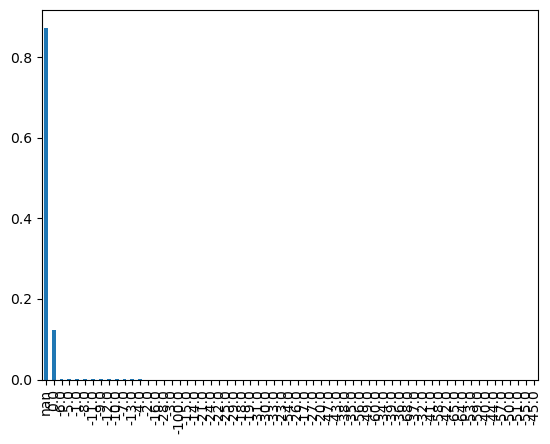

In [13]:
train_data['id_10'].value_counts(dropna=False, normalize=True).plot(kind='bar')
plt.show()

In [17]:
train_data['id_11'].value_counts(dropna=False, normalize=True).head(10)

NaN           0.761273
100.000000    0.225492
95.080002     0.002085
95.160004     0.001277
97.120003     0.000745
96.669998     0.000564
95.650002     0.000484
96.190002     0.000408
94.290001     0.000386
93.550003     0.000345
Name: id_11, dtype: float64

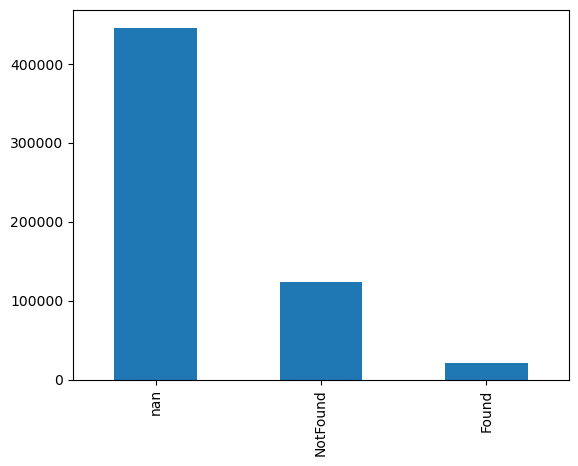

In [19]:
train_data['id_12'].value_counts(dropna=False).plot(kind='bar')
plt.show()

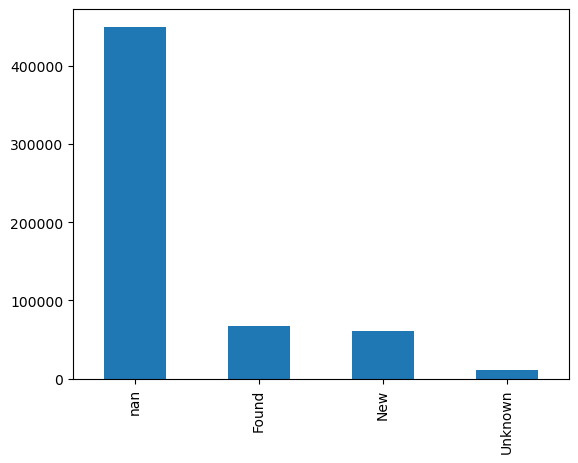

In [20]:
train_data['id_15'].value_counts(dropna=False).plot(kind='bar')
plt.show()

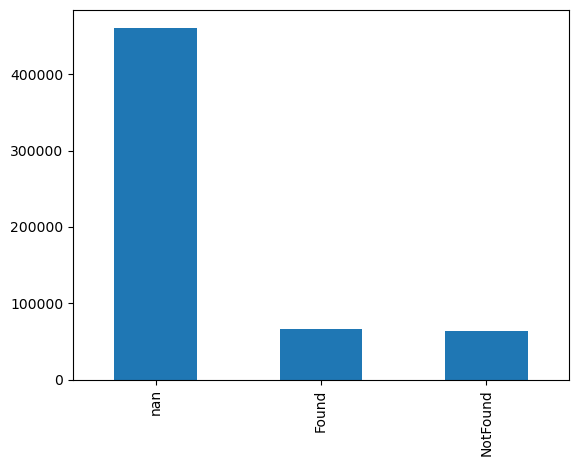

In [21]:
train_data['id_16'].value_counts(dropna=False).plot(kind='bar')
plt.show()

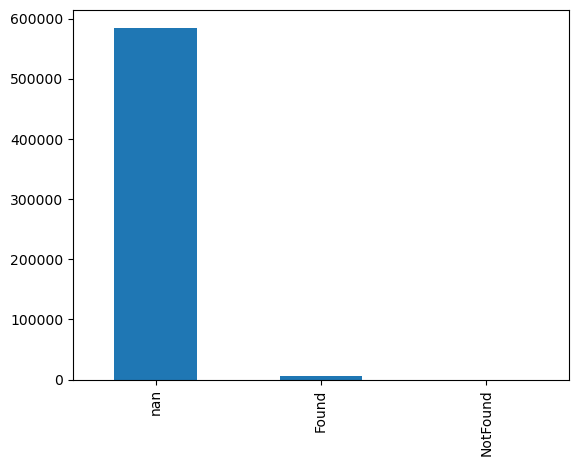

In [22]:
train_data['id_27'].value_counts(dropna=False).plot(kind='bar')
plt.show()

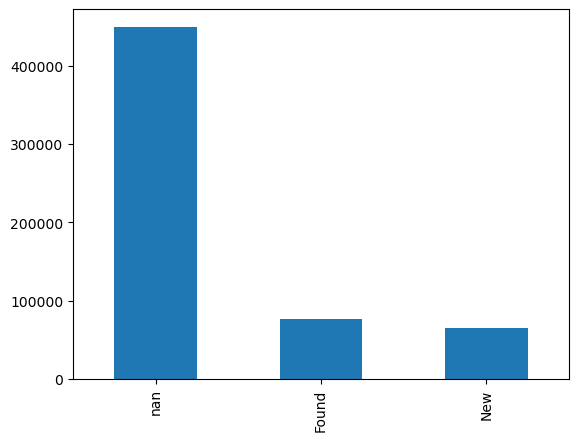

In [23]:
train_data['id_28'].value_counts(dropna=False).plot(kind='bar')
plt.show()

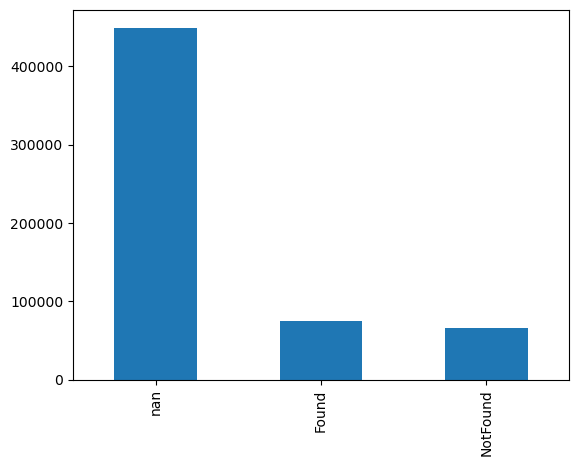

In [24]:
train_data['id_29'].value_counts(dropna=False).plot(kind='bar')
plt.show()

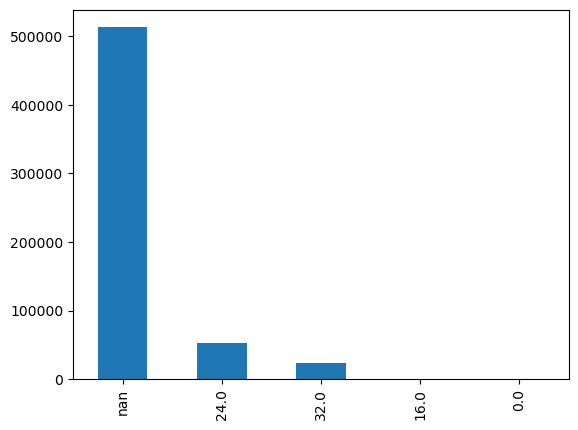

In [25]:
train_data['id_32'].value_counts(dropna=False).plot(kind='bar')
plt.show()

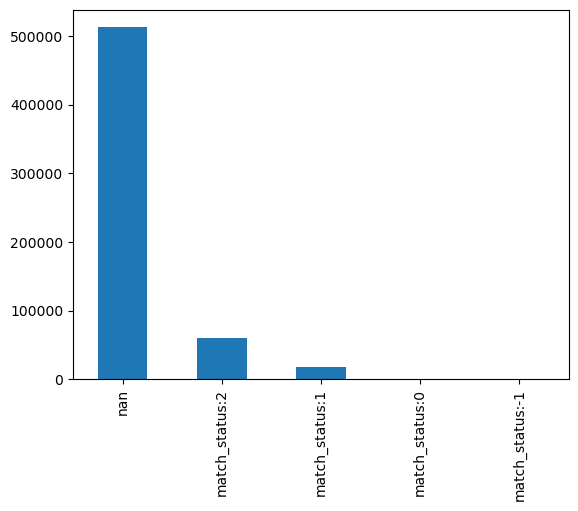

In [27]:
train_data['id_34'].value_counts(dropna=False).plot(kind='bar')
plt.show()

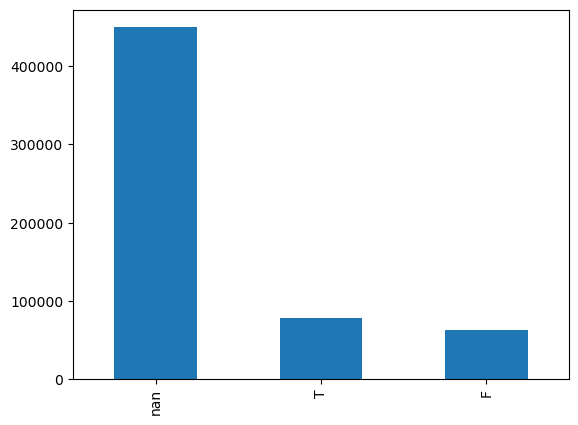

In [28]:
train_data['id_35'].value_counts(dropna=False).plot(kind='bar')
plt.show()

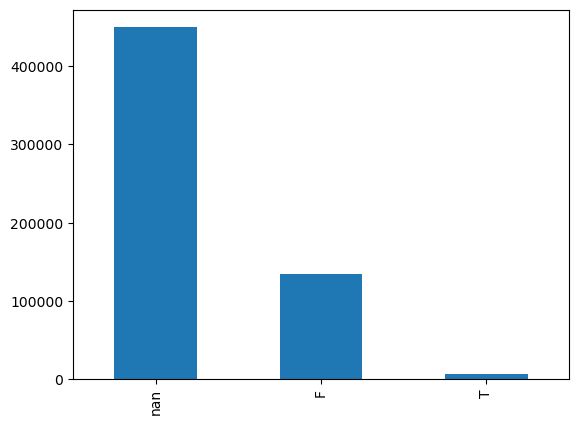

In [29]:
train_data['id_36'].value_counts(dropna=False).plot(kind='bar')
plt.show()

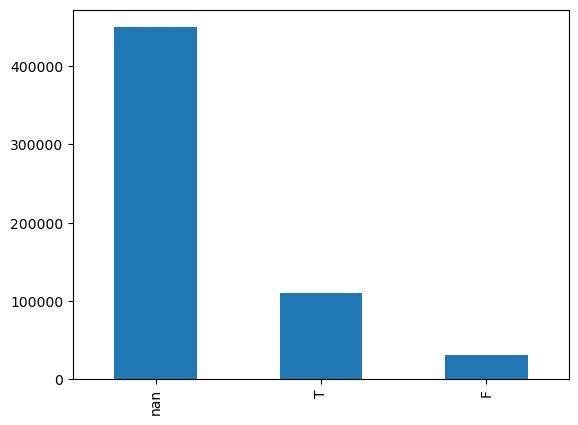

In [30]:
train_data['id_37'].value_counts(dropna=False).plot(kind='bar')
plt.show()

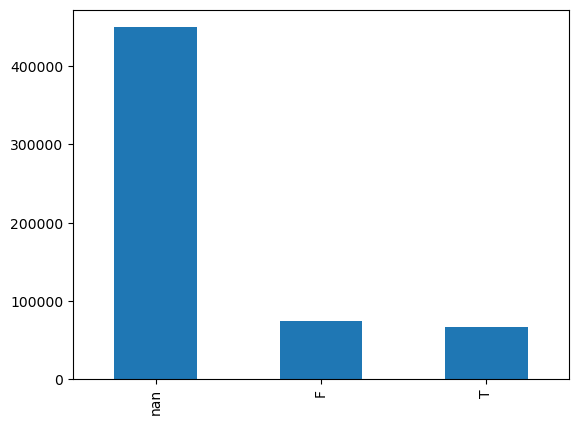

In [31]:
train_data['id_38'].value_counts(dropna=False).plot(kind='bar')
plt.show()

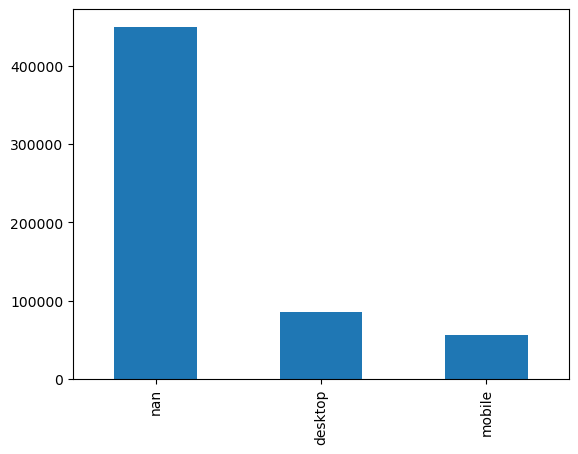

In [32]:
train_data["DeviceType"].value_counts(dropna=False).plot(kind='bar')
plt.show()

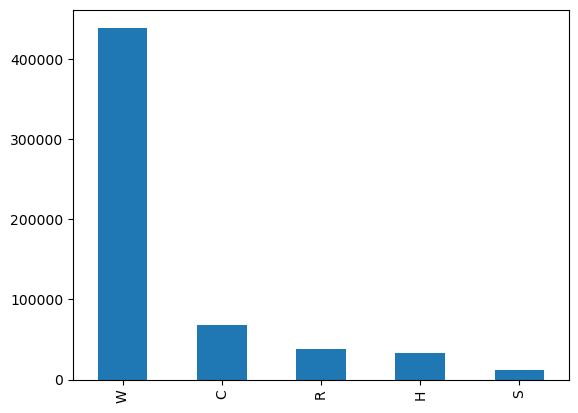

In [35]:
train_data["ProductCD"].value_counts(dropna=False).plot(kind='bar')
plt.show()

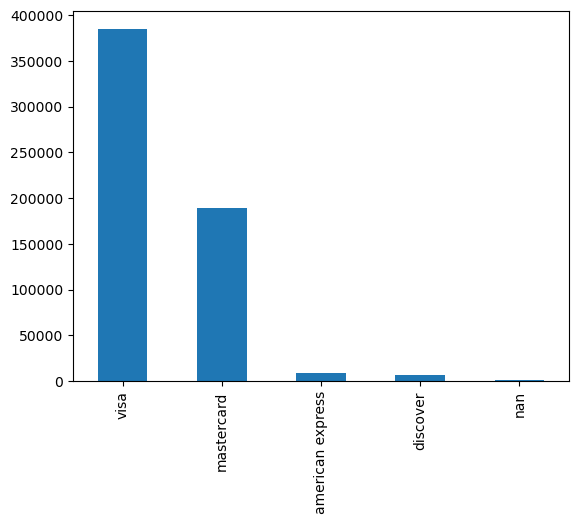

In [36]:
train_data["card4"].value_counts(dropna=False).plot(kind='bar')
plt.show()  

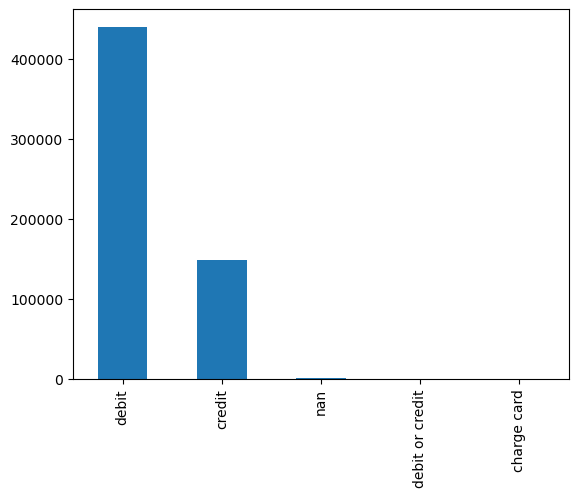

In [37]:
train_data["card6"].value_counts(dropna=False).plot(kind='bar').plot(kind='bar')
plt.show()

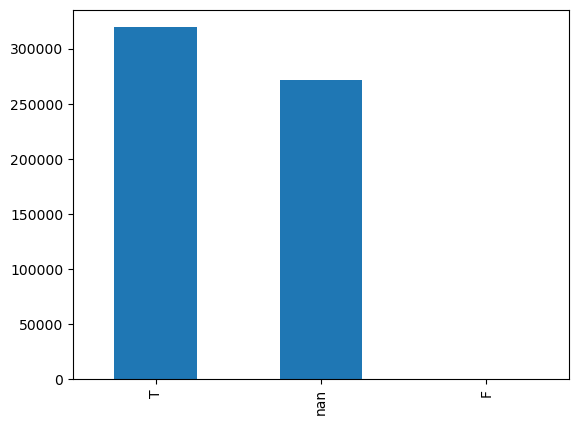

In [38]:
train_data["M1"].value_counts(dropna=False).plot(kind='bar').plot(kind='bar')
plt.show()

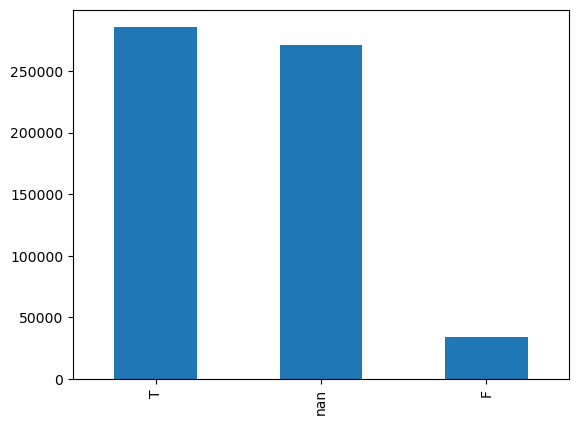

In [39]:
train_data["M2"].value_counts(dropna=False).plot(kind='bar')
plt.show()

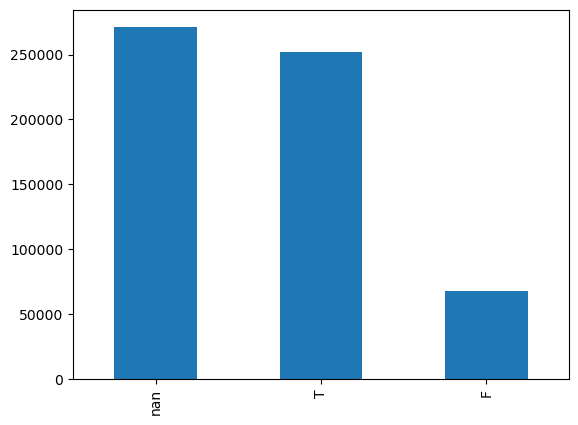

In [40]:
train_data["M3"].value_counts(dropna=False).plot(kind='bar')
plt.show()

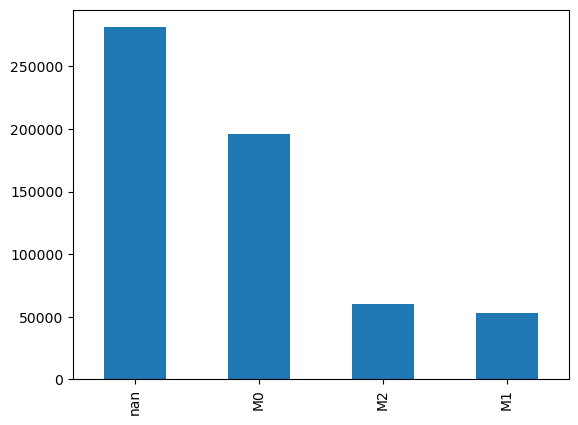

In [41]:
train_data["M4"].value_counts(dropna=False).plot(kind='bar')
plt.show()

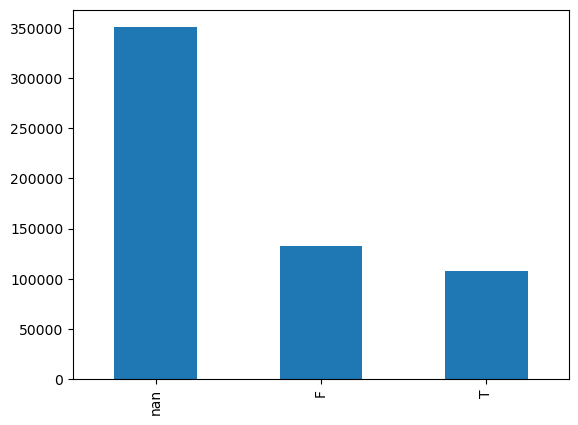

In [42]:
train_data["M5"].value_counts(dropna=False).plot(kind='bar')
plt.show()

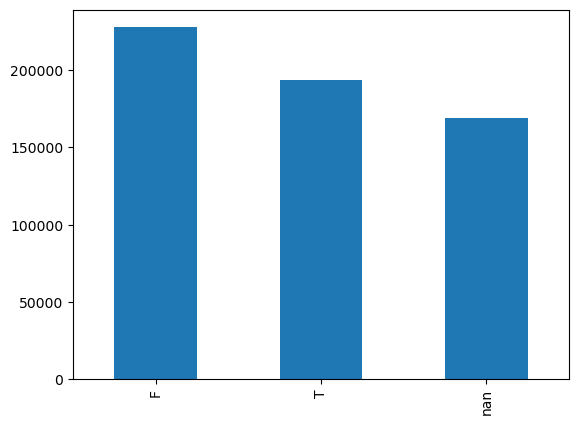

In [43]:
train_data["M6"].value_counts(dropna=False).plot(kind='bar')
plt.show()

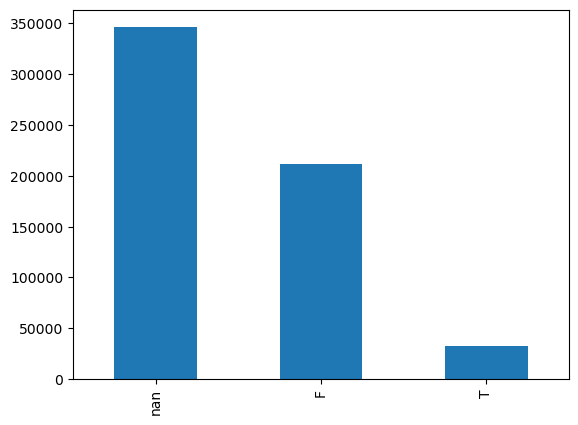

In [44]:
train_data["M7"].value_counts(dropna=False).plot(kind='bar')
plt.show()

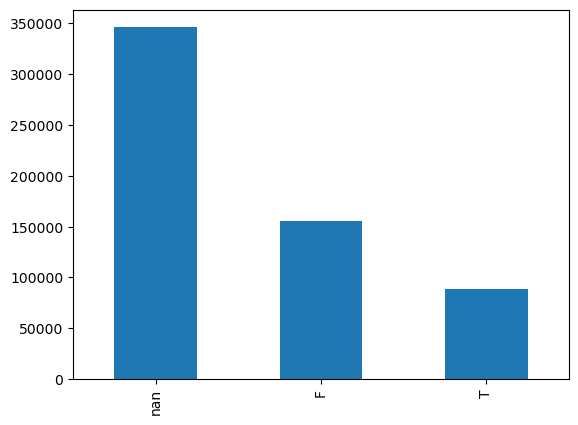

In [45]:
train_data["M8"].value_counts(dropna=False).plot(kind='bar')
plt.show()

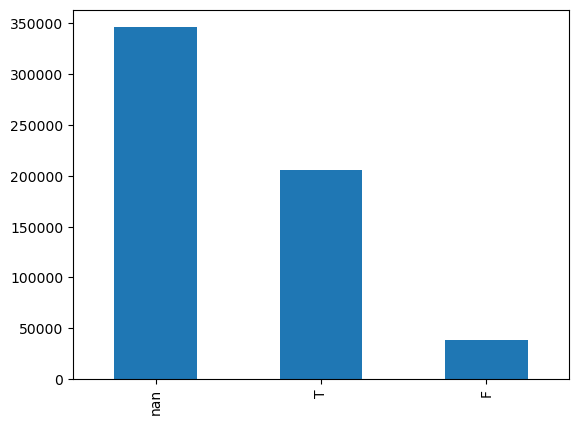

In [46]:
train_data["M9"].value_counts(dropna=False).plot(kind='bar')
plt.show()

We can probably predict most numerical values as most columns have >80% the same values, we will fill these NaNs with the median. For the categorical columns, we can't really predict so we will fill these values with unknown. We will also normalize the data so that we can use it in our model.

In [71]:
for column in train_data.columns:
    if train_data[column].dtype == np.float64:
        train_data[column].fillna(train_data[column].median(), inplace=True)
    elif train_data[column].dtype == np.int64:
        train_data[column].fillna(train_data[column].median(), inplace=True)
    else:
        train_data[column].fillna('unknown', inplace=True)

for column in test_data.columns:
    if test_data[column].dtype == np.float64:
        test_data[column].fillna(test_data[column].median(), inplace=True)
    elif test_data[column].dtype == np.int64:
        test_data[column].fillna(test_data[column].median(), inplace=True)
    else:
        test_data[column].fillna('unknown', inplace=True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_data[train_data.columns] = scaler.fit_transform(train_data[train_data.columns])
test_data[test_data.columns] = scaler.fit_transform(test_data[test_data.columns])

null_counts_train = train_data.isnull().any().sum()
null_counts_test = test_data.isnull().any().sum()

print(null_counts_train)
print(null_counts_test)

0
0


We will need to convert the categorical columns into numerical columns so that we can use them in our model. We will use the LabelEncoder from sklearn to do this.

In [115]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in train_data.columns:
    if train_data[column].dtype == type(object):
        train_data[column] = le.fit_transform(train_data[column])

for column in test_data.columns:
    if test_data[column].dtype == type(object):
        test_data[column] = le.fit_transform(test_data[column])

print(train_data.dtypes)
print(test_data.dtypes)

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD           int32
card1               int64
card2             float64
card3             float64
card4               int32
card5             float64
card6               int32
addr1             float64
addr2             float64
dist1             float64
dist2             float64
P_emaildomain       int32
R_emaildomain       int32
C1                float64
C2                float64
C3                float64
C4                float64
C5                float64
C6                float64
C7                float64
C8                float64
C9                float64
C10               float64
C11               float64
C12               float64
C13               float64
C14               float64
D1                float64
D2                float64
D3                float64
D4                float64
D5                float64
D6                float64
D7                float64
D8          

if we look at the column names in the test set, we see that the id columns have a '-' instead of a '_', we will need to change this so that we can use our model on the test set.

In [94]:
test_data.columns = test_data.columns.str.replace('-', '_')